## Passive Neuronal Membrane (RC-circuit)

In [400]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

input current

In [2]:
I = 10 #nA

capacitance and leak resistance

In [3]:
C = 0.1 #nF
R = 100 #M ohms
tau = R*C #ms

membrane potential $\frac{dV}{dt}=-\frac{V}{RC} + \frac{I}{C}$

In [4]:
# tau = 0 #experimental (ms)

In [5]:
V = 0 #mV

In [6]:
def plot(I, C, R, tau, V):
    V_inf = I*R # peak V (in mV)
    V_trace = [V] #mV
    
    tstop = 150 #ms
    h = 0.2 # step size (ms)
    for t in np.arange(h, tstop, h):
        # Euler method: V(t+h) = V(t) + h*dV/dt
        V = V + h*(-(V/(R*C))+I/C)

        # verify membrane time constant
        if (not tau and (V>0.6321*V_inf)):
            tau = t
            print('tau = %.3f ms'%tau)

        # stop current injection
        if t >= 0.6*tstop:
            I=0

        V_trace += [V]
        if t % 10 == 0:
            plt.plot(np.arange(0, t+h, h), V_trace, color='r')
            plt.xlim(0, tstop)
            plt.ylim(0, V_inf)
            plt.draw()

    plt.show()

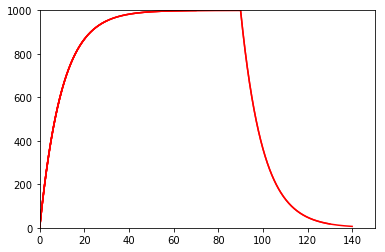

In [7]:
plot(I, C, R, tau, V)

The code demonstrates how a membrane responds to a constant current input, that is tured in for a fixed time interval and then turned off.

** What if the current were not turned off? What would the steady state voltage of the membrane be**

* $I*R = 10*100 = 1000$

**Does it reach a stable value more quickly or more slowly after multiplying the resistance (R) by 5?**

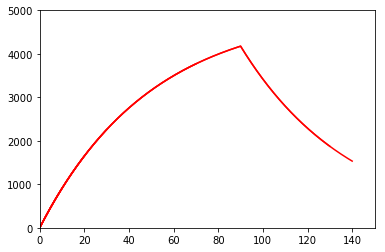

In [8]:
plot(I, C, R*5, tau, V)

* more slowly

** Does it reach a stable value more quickly or more slowly after dividing the capacitor (C) by 10?**

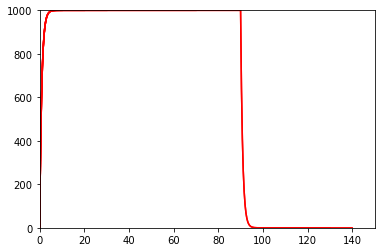

In [9]:
plot(I, C/10, R, tau, V)

* more quickly

** ... after R*10 and C/10?**

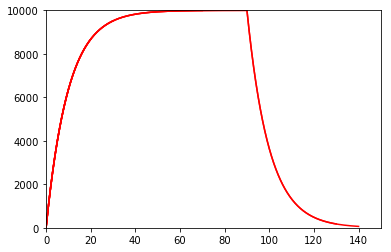

In [10]:
plot(I, C/10, R*10, tau, V)

* same rate

## Integrate-and-fire neuron model

input current

In [421]:
I = 0.25159 #nA

capacitance and leak resistance

In [422]:
C = 1 #nF
R = 40 #M ohms

I&F implementation: $\frac{dV}{dt} = - \frac{V}{RC}+\frac{I}{C}$

using h=1 ms step size, Euler method

In [423]:
V = 0

In [424]:
tstop = 200
abs_ref = 5 # absolute refractory period
ref = 0 # absolute refractory period counter
V_trace = [] # voltage trace for plotting
V_th = 10 # spike threshold (nA)

0.0
0.24847116931167187
0.4908075635946144
0.7271606509839754
0.9576781598533177
1.182504171149665
1.4017792084487881
1.6156403257870047
1.824221193324422
2.0276521808931327
2.22606043948261
2.419569980713207
2.6083017543474636
2.792373723887642
2.9719009403067553
3.1469956139591715
3.31776718471574
3.4843223903672684
3.6467653333391215
3.8051975457586233
3.959718052915942
4.110423435158119
4.257407888254934
4.40076328227432
4.540579219004155
4.676943087956289
4.8099401209878385
4.939653445573867
5.066164136764771
5.189551267860814
5.309891959835524
5.427261429538807
5.541733036709928
5.653378329829737
5.762267090840793
5.868467378763362
5.9720455722345065
6.073066410996901
6.171593036363281
6.267687030681813
6.361408455827072
6.4528158907406645
6.541966468044977
6.628915909752919
6.713718562096006
6.796427429492511
6.877094207676959
6.955769316011643
7.032501929000362
7.107340007024095
7.18033032631779
7.251518508207044
7.320949047622911
7.388665340912678
7.454709712964006
7.519123443

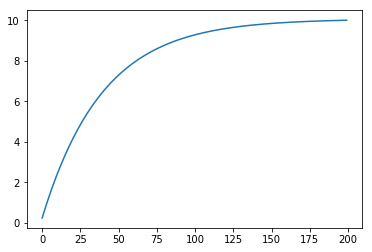

In [425]:
for t in range(tstop):
    if not ref:
        V = V - (V/(R*C)) + (I/C)
    
    else:
        ref -= 1
        V = 0.2*V_th # reset voltage
    
    if V > V_th:
        V = 50 # emit spike
        ref = abs_ref # set refractory counter
    V_trace += [V]
    print(0+(R*I)*(1-math.exp(-t/(R*C))))

plt.plot(V_trace)
plt.show()

8.847968677143804


## Neuron w/ async inputs

input current

In [491]:
I = 1 #nA

capacitance and leak resistance

In [492]:
C = 1 # nF
R = 40 # M ohms

I&F implementation: $\frac{dV}{dt} = - \frac{V}{RC}+\frac{I}{C}$

using h=1 ms step size, Euler method

In [493]:
V = 0
tstop = 1000
abs_ref = 5
ref = 0
V_trace = []
V_th = 10
spike_times = []

In [494]:
noise_amp = 4 # amplitude of added noise
I += noise_amp*np.random.normal(0, 1, (tstop,)) # nA; Gaussian noise

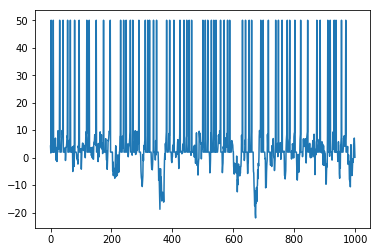

In [495]:
for t in range(tstop):
    if not ref:
        V = V - (V/(R*C)) + (I[t]/C)
    else:
        ref -= 1
        V = 0.2 * V_th # reset voltage
    if V > V_th:
        V = 50 # emit spike
        ref = abs_ref
    V_trace += [V]

plt.plot(V_trace)
plt.show()

In [1]:
plt.hist(V_trace)
plt.show()

NameError: name 'plt' is not defined